<a href="https://colab.research.google.com/github/aguchhait-stack/Segmentation/blob/main/Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import opendatasets as od
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import seaborn as sns
import matplotlib.pyplot as plt
od.download("https://www.kaggle.com/datasets/mirichoi0218/insurance")

Skipping, found downloaded files in "./insurance" (use force=True to force download)


In [26]:
df=pd.read_csv("insurance/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [28]:
df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [29]:
le=LabelEncoder()
for col in df.columns:
  if df[col].dtype==object:
    df[col]=le.fit_transform(df[col])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [30]:
X=df.drop('charges',axis=1)
y=df['charges']

In [31]:
scaler=StandardScaler()
scaled_X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [32]:
X_train,X_test,y_train,y_test= train_test_split(scaled_X,y,test_size=0.2,random_state=42)

In [37]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [60]:
r2=r2_score(y_test,y_pred)
rmse=mean_squared_error(y_test,y_pred)
print(f"R2 Score: {r2:.4f}")
print(f"Mean Squared Errore: {rmse:.2f}")

R2 Score: 0.7833
Mean Squared Errore: 33635210.43


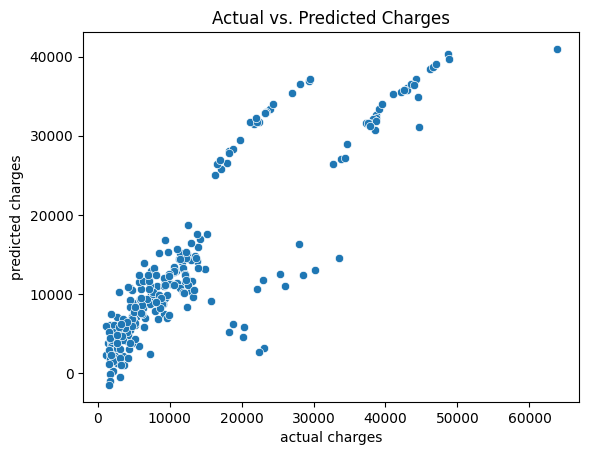

In [80]:
sns.scatterplot(x=y_test,y=y_pred)
plt.title("Actual vs. Predicted Charges")
plt.xlabel("actual charges")
plt.ylabel("predicted charges")
plt.show()

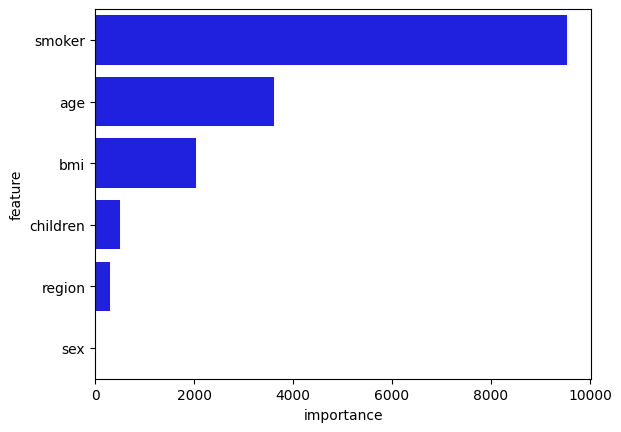

In [97]:
feature_importance = pd.DataFrame({'feature':X_train.columns,'importance':model.coef_})
feature_importance['importance']=feature_importance['importance'].abs()
feature_importance=feature_importance.sort_values(by='importance',ascending=False)
sns.barplot(x='importance',y='feature',data=feature_importance,color='b')
plt.show()